In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [167]:
df = pd.read_csv("./Desktop/Datasets/spamhamdata.csv", sep="\t", header=None, names=["label", "message"])

In [168]:
df.shape

(5572, 2)

In [169]:
df.head(20)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [170]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [171]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [172]:
df.duplicated().sum()

403

In [173]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.strip()
    return text


df['cleaned_message'] = df['message'].apply(clean_text)

df.head(15)

,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in a wkly comp to win FA Cup final...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
5,1,FreeMsg Hey there darling it's been 3 week's n...,FreeMsg Hey there darling its been weeks now ...
6,0,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
7,0,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...
8,1,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...
9,1,Had your mobile 11 months or more? U R entitle...,Had your mobile months or more U R entitled t...


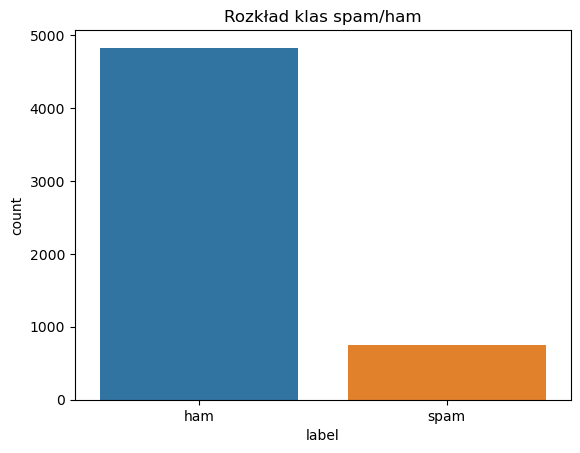

In [174]:
sns.countplot(x='label', data=df)
plt.title('Rozkład klas spam/ham')
plt.xticks(ticks=[0, 1], labels=['ham', 'spam'])
plt.show()

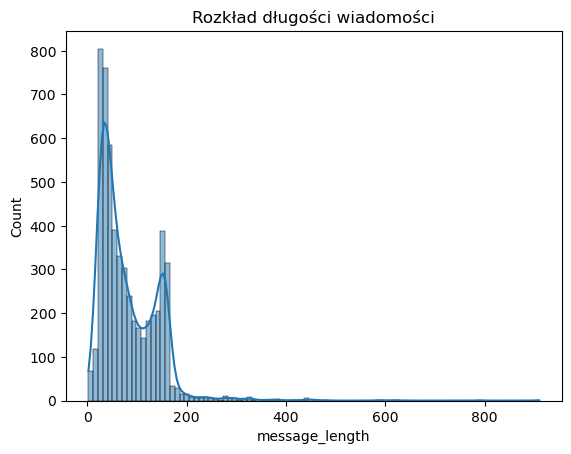

In [175]:
df['message_length'] = df['message'].apply(len)

sns.histplot(df['message_length'], kde=True)
plt.title('Rozkład długości wiadomości')
plt.show()

In [176]:
df['message_length'].describe()

count    5572.000000
mean       80.490309
std        59.944527
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message_length, dtype: float64

In [177]:
X = df['cleaned_message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

X_train_vect.shape

(4457, 7316)

In [179]:
model = MultinomialNB()

model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)

print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))


Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



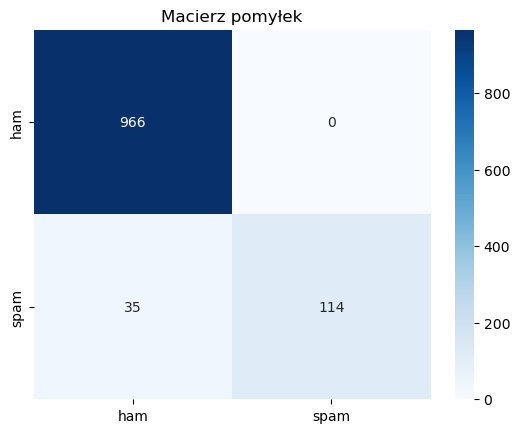

In [180]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Macierz pomyłek')
plt.show()

In [181]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight='balanced')

log_model.fit(X_train_vect, y_train)

y_pred_log = log_model.predict(X_test_vect)

print("\nRaport klasyfikacji (Logistic Regression):\n", classification_report(y_test, y_pred_log))


Raport klasyfikacji (Logistic Regression):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.95      0.93      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



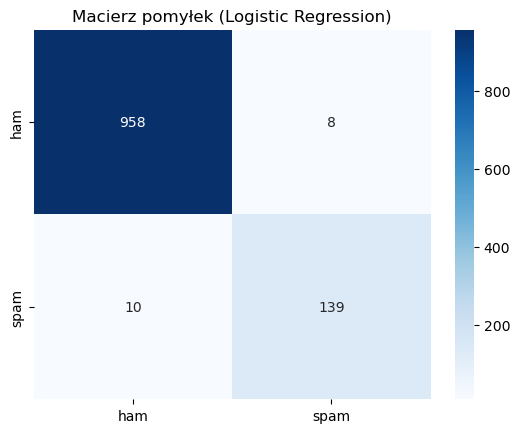

In [182]:
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Macierz pomyłek (Logistic Regression)')
plt.show()


In [183]:
from sklearn.model_selection import RandomizedSearchCV


param_dist_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0,20,30,40,50] 
}


nb_model = MultinomialNB()

random_search_nb = RandomizedSearchCV(nb_model, param_distributions=param_dist_nb, n_iter=10, random_state=42)

random_search_nb.fit(X_train_vect, y_train)

print(f"Najlepsze parametry dla Naive Bayes: {random_search_nb.best_params_}")

y_pred_nb = random_search_nb.predict(X_test_vect)

print("\nRaport klasyfikacji (Naive Bayes):\n", classification_report(y_test, y_pred_nb))


Najlepsze parametry dla Naive Bayes: {'alpha': 0.5}

Raport klasyfikacji (Naive Bayes):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



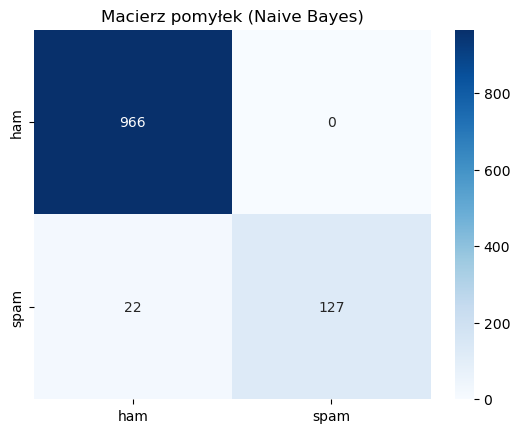

In [184]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Macierz pomyłek (Naive Bayes)')
plt.show()

In [185]:
param_dist_log = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l2', 'l1'], 
    'solver': ['liblinear', 'saga']  
}

log_model = LogisticRegression(max_iter=2000, class_weight='balanced')

random_search_log = RandomizedSearchCV(log_model, param_distributions=param_dist_log, n_iter=10, random_state=42)

random_search_log.fit(X_train_vect, y_train)

print(f"Najlepsze parametry dla Logistic Regression: {random_search_log.best_params_}")

y_pred_log = random_search_log.predict(X_test_vect)

print("\nRaport klasyfikacji (Logistic Regression):\n", classification_report(y_test, y_pred_log))


Najlepsze parametry dla Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'C': 100}

Raport klasyfikacji (Logistic Regression):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



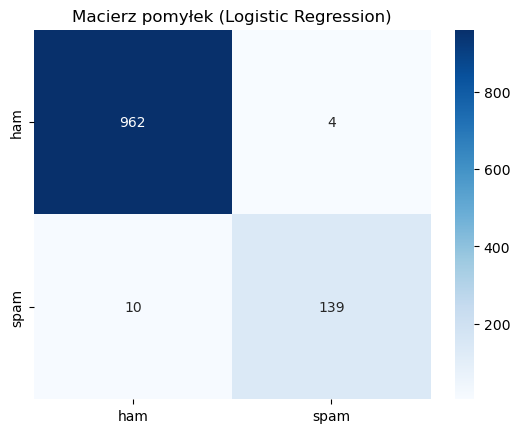

In [186]:
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Macierz pomyłek (Logistic Regression)')
plt.show()